In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

In [25]:
# Load the MNIST dataset directly from TensorFlow

mnist = ks.datasets.mnist

In [26]:
# Train and test of the datasets

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [27]:
# Normalize the pixel values (0-255) to the range (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0


# Checking the shape of the dataset
print(f"Train Data Shape: {x_train.shape}, Test Data Shape: {x_test.shape}")

Train Data Shape: (60000, 28, 28), Test Data Shape: (10000, 28, 28)


In [28]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

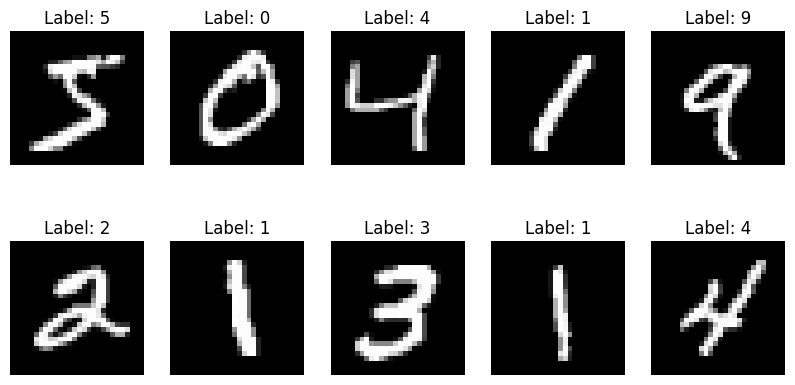

In [29]:


# Visualize some sample images

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [30]:
# Add a channel dimension (since it's grayscale, the channel is 1)

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [31]:
# Define CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

C:\Users\barun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9117 - loss: 0.2894 - val_accuracy: 0.9865 - val_loss: 0.0409
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9888 - val_loss: 0.0336
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9903 - val_loss: 0.0306
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9902 - val_loss: 0.0339
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9949 - loss: 0.0138 - val_accuracy: 0.9917 - val_loss: 0.0279
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9970 - loss: 0.0089 - val_accuracy: 0.9910 - val_loss: 0.0338
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9971 - loss: 0.0088 - val_accuracy: 0.9935 - val_loss: 0.0247
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9980 -

In [34]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9906 - val_loss: 0.0415
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9881 - val_loss: 0.0576
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9987 - loss: 0.0039 - val_accuracy: 0.9910 - val_loss: 0.0415
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9916 - val_loss: 0.0392
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9986 - loss: 0.0046 - val_accuracy: 0.9914 - val_loss: 0.0471
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9983 - loss: 0.0044 - val_accuracy: 0.9898 - val_loss: 0.0512
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9919 - val_loss: 0.0419
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9988 -

In [35]:
# Evaluate performance on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9893 - loss: 0.0628
Test Accuracy: 99.16%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step 


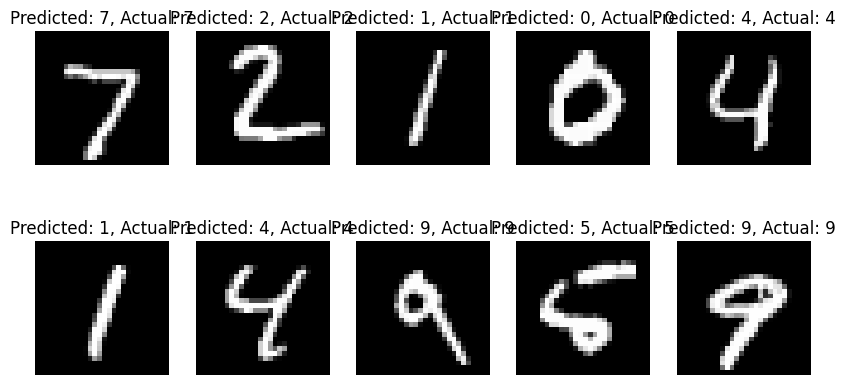

In [36]:
# Make predictions on test data
predictions = model.predict(x_test)

# Display sample predictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()

In [37]:
model.save("mnist_cnn_model.h5")